In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
#建立共用函數
def weight(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1), name='w')
def bias(shape):
    return tf.Variable(tf.constant(0.1,shape=shape), name='b')
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')
def max_pool(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [3]:
#輸入層
with tf.name_scope('input_layer'):
    x=tf.placeholder('float', shape=[None, 784], name='x')
    x_image=tf.reshape(x, [-1,28,28,1])

In [4]:
#卷積層1
with tf.name_scope('c1_conv'):
    W1=weight([5,5,1,16])
    b1=bias([16])
    conv1=conv2d(x_image, W1)+b1
    c1_conv=tf.nn.relu(conv1)

In [5]:
#池化層1
with tf.name_scope('c1_pool'):
    c1_pool=max_pool(c1_conv)

In [6]:
#卷積層2 池化層2
with tf.name_scope('c2_conv'):
    W2=weight([5,5,16,36])
    b2=bias([36])
    conv2=conv2d(c1_pool, W2)+b2
    c2_conv=tf.nn.relu(conv2)
with tf.name_scope('c2_pool'):
    c2_pool=max_pool(c2_conv)

In [7]:
#Fully connected layer
with tf.name_scope('d_flat'):
    d_flat=tf.reshape(c2_pool, [-1, 1764])
with tf.name_scope('hidden_layer'):
    W3=weight([1764,256])
    b3=bias([256])
    hidden_layer=tf.nn.relu(tf.matmul(d_flat, W3)+b3)
    dropout_layer=tf.nn.dropout(hidden_layer, keep_prob=0.8)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
#output layer
with tf.name_scope('output_layer'):
    W4=weight([256, 10])
    b4=bias([10])
    y_predict=tf.nn.softmax(tf.matmul(dropout_layer, W4)+b4)

In [9]:
#設定模型最佳化步驟
y_label=tf.placeholder('float', shape=[None, 10], name='y_label')
loss_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict, labels=y_label))
optimizer=tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss_function)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [10]:
#定義準確率
correct_prediction=tf.equal(tf.argmax(y_predict, 1),
                            tf.argmax(y_label, 1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction, 'float'))

In [11]:
#訓練模型
train_epoch=20
batch_size=100
total_batch=int(mnist.train.num_examples/batch_size)
epoch_list=[]; acc_list=[]; loss_list=[]
from time import time
start_time=time()
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [12]:
for epoch in range(train_epoch):
    for i in range(total_batch):
        x_batch, y_batch=mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={x:x_batch,
                                       y_label:y_batch})
    loss, acc=sess.run([loss_function, accuracy], feed_dict={x:mnist.validation.images, 
                                                             y_label:mnist.validation.labels})
    epoch_list.append(epoch); loss_list.append(loss); acc_list.append(acc)
    
    print('Epoch: %02d'%(epoch+1), 
          'Loss: %.9f' %(loss),
          'Accuracy: ', acc)
duration=time()-start_time
print("Train finish takes", duration)

Epoch: 01 Loss: 1.567180514 Accuracy:  0.9138
Epoch: 02 Loss: 1.525752783 Accuracy:  0.9452
Epoch: 03 Loss: 1.512346983 Accuracy:  0.9552
Epoch: 04 Loss: 1.499818563 Accuracy:  0.967
Epoch: 05 Loss: 1.495138645 Accuracy:  0.97
Epoch: 06 Loss: 1.494814277 Accuracy:  0.9694
Epoch: 07 Loss: 1.490099072 Accuracy:  0.974
Epoch: 08 Loss: 1.488441586 Accuracy:  0.9756
Epoch: 09 Loss: 1.486319661 Accuracy:  0.9776
Epoch: 10 Loss: 1.485114813 Accuracy:  0.978
Epoch: 11 Loss: 1.480321765 Accuracy:  0.9828
Epoch: 12 Loss: 1.480521917 Accuracy:  0.983
Epoch: 13 Loss: 1.480690718 Accuracy:  0.9816
Epoch: 14 Loss: 1.480835319 Accuracy:  0.9812
Epoch: 15 Loss: 1.478366852 Accuracy:  0.9842
Epoch: 16 Loss: 1.477877498 Accuracy:  0.9846
Epoch: 17 Loss: 1.477572322 Accuracy:  0.9854
Epoch: 18 Loss: 1.478241563 Accuracy:  0.985
Epoch: 19 Loss: 1.477253556 Accuracy:  0.9846
Epoch: 20 Loss: 1.476997018 Accuracy:  0.9852
Train finish takes 1149.2768030166626


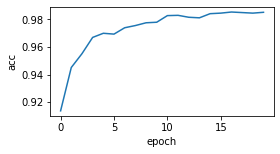

In [13]:
import matplotlib.pyplot as plt
fig=plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, acc_list)
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [14]:
#評估模型準確率
print("Accuracy:", sess.run(accuracy, feed_dict={x:mnist.test.images, 
                                                 y_label:mnist.test.labels}))

Accuracy: 0.9851


In [15]:
#預測結果
prediction=sess.run(tf.argmax(y_label, 1), feed_dict={x:mnist.test.images,
                                                      y_label:mnist.test.labels})
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [16]:
import numpy as np
def show_prediction(images, labels, prediction, idx, num):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    for i in range(num):
        ax=plt.subplot(5,5,i+1)
        ax.imshow(np.reshape(images[idx], (28,28)), cmap='binary')
        title='label='+str(np.argmax(labels[idx]))+' prediction='+str(prediction[idx])
        ax.set_title(title, fontsize=9)
        idx+=1
    plt.show()

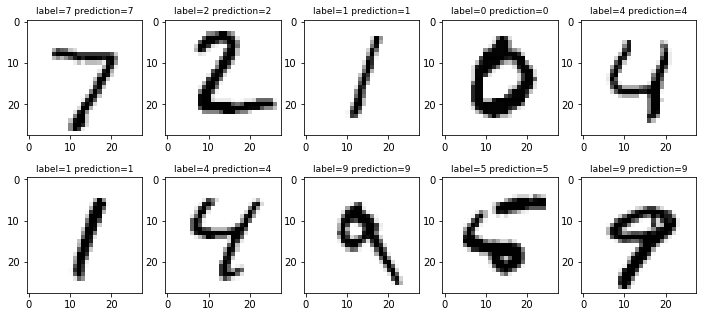

In [17]:
show_prediction(mnist.test.images, mnist.test.labels, prediction, 0, 10)

In [23]:
#找出預測錯誤
for i in range(mnist.test.num_examples):
    if prediction[i]!=np.argmax(mnist.test.labels[i]):
        print('i= ', i, 'prediction= ', prediction[i], 'label= ', np.argmax(mnist.test.labels[i]))